#Projeto de Ciência de dados - Predição do preço de ações da Ethereum com Machine Learning



#Formulação do problema e leitura dos dados
Nosso objetivo é estimar o preço de fechamento das ações da Ethereum utilizando conceitos de regressão linear múltipla.

Os atributos contidos nos dados:

1 - Date: Data observada em dias;

2 - Open: Preço de abertura das ações;

3 - Hight: Maior preço observado durante o dia;

4 - Low: Menor preço observado durante o dia;

5 - Close: Preço de fechamento das ações;

6 - Volume: A quantidade de dinheiro movimentada (negociada).


Os dados podem ser obtidos através do yahoo finance: https://finance.yahoo.com/quote/ETH-USD/history?p=ETH-USD e contém os valores das ações da Ethereum entre Outubro de 2020 à Outubro de 2021 em Dólares (U$D). 



#Importe as bibliotecas necessárias

In [ ]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from statistics import variance
from sklearn.metrics import r2_score 
from scipy.stats import t
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Lasso

#Visualizando o DataSet

In [ ]:
random.seed(42)
dados = pd.read_csv('/content/ETH-USD.csv',encoding= 'utf-8',decimal = '.')
dados.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
361,2021-10-28,3924.815430,4293.150879,3905.706055,4287.318848,4287.318848,25958154575
362,2021-10-29,4288.686523,4455.735352,4271.707520,4414.746582,4414.746582,22967641914
363,2021-10-30,4414.243652,4426.848633,4252.494141,4325.650391,4325.650391,14615490626
364,2021-10-31,4322.744141,4394.449707,4179.016113,4288.074219,4288.074219,17498160238
365,2021-11-01,4285.007813,4370.600586,4160.966797,4342.215820,4342.215820,18234517504


#Análise Descritiva dos dados

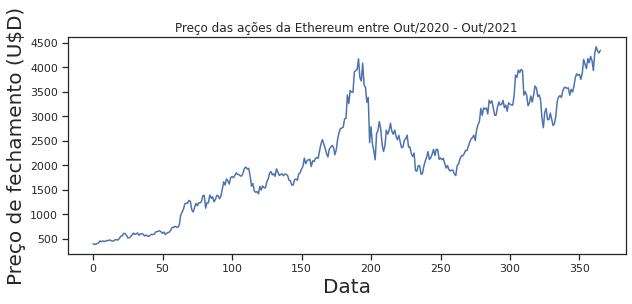

In [ ]:
plt.figure(figsize=(10, 4))
plt.title("Preço das ações da Ethereum entre Out/2020 - Out/2021")
plt.xlabel('Data', fontsize = 20) 
plt.ylabel('Preço de fechamento (U$D)', fontsize = 20) 
plt.plot(dados['Close']) 
plt.show(True)



Podemos ver que ao longo desse período de 1 ano, as ações da Ethereum apresentaram uma tendência de crescimento.

Sumarização dos dados:

In [ ]:
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,2158.181771,2244.009723,2067.498113,2169.064722,2169.064722,2.662417e+10
std,1063.800360,1100.617423,1026.043853,1066.129583,1066.129583,1.215037e+10
min,383.156036,389.515381,371.312744,383.156738,383.156738,8.125837e+09
25%,1382.345063,1441.171265,1301.597626,1384.794464,1384.794464,1.772856e+10
50%,2120.844849,2187.750122,2050.514648,2130.359375,2130.359375,2.353027e+10
75%,3017.566650,3181.712830,2938.802551,3037.583191,3037.583191,3.200445e+10
max,4414.243652,4455.735352,4271.707520,4414.746582,4414.746582,8.448291e+10


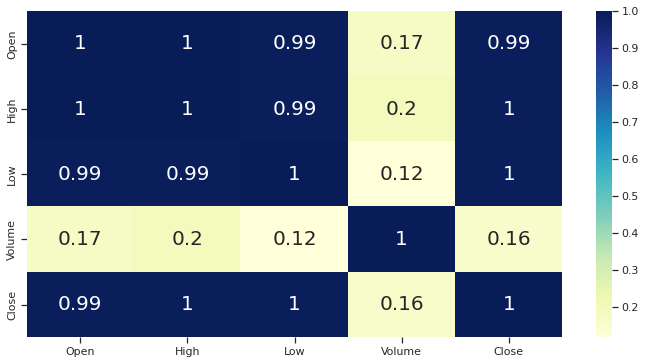

In [ ]:
dados = dados.drop(['Date','Adj Close'], axis = 1)

#Removendo atributos irrelevantes
dados = dados.reindex(columns=['Open','High','Low','Volume','Close'])
dados.describe()

sns.set_theme(style="ticks")
p = plt.figure(figsize = (12,6))
p = sns.heatmap(dados.corr(),cmap="YlGnBu",annot = True, annot_kws={'size':20})


Todos os atributos estão fortemente correlacionados entre si, exceto Volume, que possui correlação fraca.

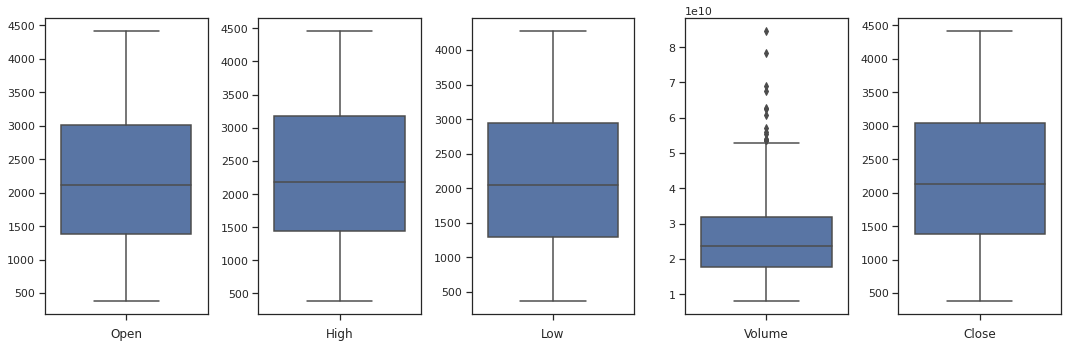

In [ ]:
fig, axes = plt.subplots(1,5, figsize=(15,5), tight_layout=True)
plt.subplots_adjust(hspace=0.40)

for i in list(range(5)):
  sns.boxplot(y=dados[list(dados.columns)[i]], ax=axes[i]).set(xlabel=list(dados.columns)[i], ylabel='')

De todas as variáveis, "Volume" foi a que apresentou a menor variância entre os valores centrais e ao mesmo tempo foi a única que apresentou um grande número de Outliers.

#Limpeza e normalização dos dados

In [ ]:
dados.isnull().sum().sort_values(ascending=False) # N tem valores inválidos

Close     0
Volume    0
Low       0
High      0
Open      0
dtype: int64

In [ ]:
dados = dados.to_numpy()
nrow,ncol = dados.shape
y = dados[:,-1]
X = dados[:, 0:ncol-1]

y_treino = y[0:300]
y_teste = y[300:]
X_treino = X[0:300 ,:]
X_teste = X[300:,:]


In [ ]:
#Normalizando para evitar o efeito da escala do atributo volume no conjunto de 
# treino e teste


# scaler = StandardScaler().fit(X_treino)
# X_treino = scaler.transform(X_treino)

# scaler2 = StandardScaler().fit(X_teste)
# X_teste = scaler2.transform(X_teste)

# np.mean(X_treino, axis = 0)
# np.mean(X_teste, axis = 0)
# np.std(X_treino, axis = 0)
# np.std(X_teste, axis = 0)

#Modelo 

In [ ]:
X_treino = sm.add_constant(X_treino)
X_teste = sm.add_constant(X_teste)

regressao = sm.OLS(y_treino,X_treino).fit()
print(regressao.summary(alpha = 0.05))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.614e+04
Date:                Fri, 12 Nov 2021   Prob (F-statistic):               0.00
Time:                        19:22:03   Log-Likelihood:                -1586.0
No. Observations:                 300   AIC:                             3182.
Df Residuals:                     295   BIC:                             3201.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6268      8.567      0.774      0.4

Como essa tabela foi gerada com os dados de treino, não podemos usar para verificar a qualidade do modelo devido a overfitting. Porém, é útil para conferir os valores dos coeficientes assim como seu intervalo de confiança. 

Como visto antes, a variável "Volume" tem uma correlação baixa não só com y mas também com as outras variáveis, dito isso, na tabela pudemos ver que seu p-valor se ultrapassa 0.5. Juntando esses fatores, iremos realizar um teste de hipótese para concluir se iremos manter "Volume" no nosso modelo antes de ajustá-lo em definitivo.

#Lasso

In [ ]:
alpha = 0.01
# notice that we need to normalize the attributes: normalize = True
lasso = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lasso.fit(X_treino, y_treino)            
y_pred = lasso.predict(X_teste)         

RSME = mean_squared_error(y_teste, y_pred)        
print('Erro Quadrátic médio:', RSME)

R2 = r2_score(y_teste, y_pred)
print("R2:", R2) 

adjusted_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_teste.shape[1]-1) 
print('Adjusted R2:', adjusted_R2)


Erro Quadrátic médio: 4207.258969926215
R2: 0.9759991777664833
Adjusted R2: 0.9743720033777703


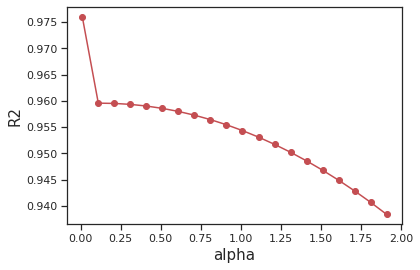

In [ ]:
vR2 = []
valpha = []
for alpha in np.arange(0.01,2,0.1):
    lasso = Lasso(alpha = alpha, normalize = True)
    lasso.fit(X_treino, y_treino)            
    y_pred = lasso.predict(X_teste)           
    r2 = r2_score(y_teste, y_pred)
    vR2.append(r2)
    valpha.append(alpha)
plt.plot(valpha, vR2, '-ro')
plt.xlabel("alpha", fontsize=15)
plt.ylabel("R2", fontsize=15)
plt.show(True)

In [ ]:
lasso = Lasso(alpha = 0.01, normalize = True)
lasso.fit(X_treino, y_treino)             
print('Coeficientes: Open, High, Low, Volume')
lasso.coef_

Coeficientes: Open, High, Low, Volume


array([ 0.00000000e+00, -5.40275830e-01,  8.65784966e-01,  6.67265423e-01,
        1.42837151e-10])

In [ ]:
beta = np.dot(np.dot(np.linalg.pinv(np.dot(X_treino.transpose(), X_treino)), X_treino.transpose()), y_treino)
print('Beta:',beta)


Beta: [ 6.85711715e-05  3.32863383e-01  3.40482654e-01  3.31818480e-01
 -3.56685666e-11]


#Teste de hipótese e Predição dos Valores no conjunto de testes

In [ ]:
p = 5
k = 4
n = len(dados)
beta4 = beta[4]

y_transposto = y_treino.T
y_transposto_y = y_transposto.dot(y_treino)
beta_transposto = beta.T


x_transposta = X_treino.T
x_transposta_x = x_transposta.dot(X_treino)
inversa_x_transposta_x = np.linalg.inv(x_transposta_x)
x_transposta_y = x_transposta.dot(y_treino)

sigma = (y_transposto_y - (beta_transposto.dot(x_transposta_y)))/ n-p
print(sigma)

t4 = beta4/math.sqrt(sigma*inversa_x_transposta_x[4,4])

inf,sup = t.interval(0.95,n-p)

if t4 < inf or t4 > sup:
    print('Rejeita-se h0, x4 é importante para o modelo')
else:
    print('Aceita-se h0, x4 pode ser tirado do modelo')

#Concluímos que a variável volume pode ser retirada do nosso modelo de regressão 




5711.306743443989
Aceita-se h0, x4 pode ser tirado do modelo


Reformulando o conjunto de dados para a o novo modelo

In [ ]:
#Removendo a última coluna Volume do modelo
newdados = pd.read_csv('/content/ETH-USD.csv',encoding= 'utf-8',decimal = '.')

newdados = newdados.drop(['Date','Adj Close','Volume'], axis = 1)

#Removendo atributos irrelevantes
newdados = newdados.reindex(columns=['Open','High','Low','Close'])

newdados = newdados.to_numpy()
nrow,ncol = newdados.shape
y = newdados[:,-1]
X = newdados[:, 0:ncol-1]

y_treino = y[0:300]
y_teste = y[300:]
X_treino = X[0:300 ,:]
X_teste = X[300:,:]

X_treino = sm.add_constant(X_treino)
X_teste = sm.add_constant(X_teste)


In [ ]:
#Ajuste
modelo = LinearRegression().fit(X_treino,y_treino)
y_predito = modelo.predict(X_teste)


#Avaliação do modelo

In [ ]:
R2 = r2_score(y_teste, y_predito)
print('R2:', R2)

error = mean_squared_error(y_teste,y_predito)
print('Erro Quadrático médio:', error)

adjusted_R2 = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_teste.shape[1]-1) 
print('Adjusted R2:', adjusted_R2)


R2: 0.9762974007663054
Erro Quadrático médio: 4154.981536310295
Adjusted R2: 0.9746904448860549


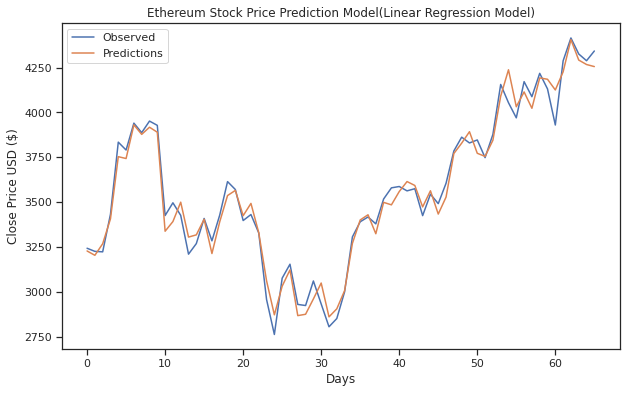

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Ethereum Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(y_teste)
plt.plot(y_predito)
plt.legend(["Observed", "Predictions"])
plt.show()

#Análise dos resíduos

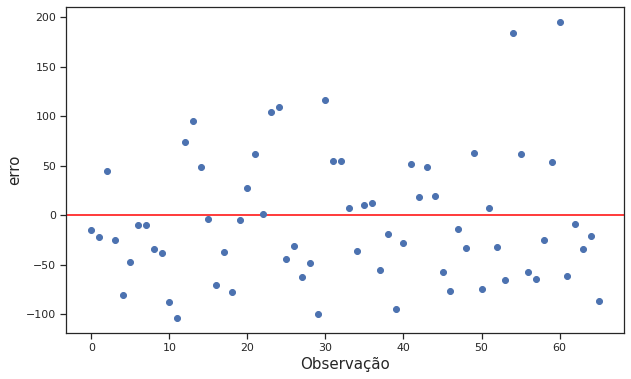

In [ ]:
e = np.array(y_predito - y_teste)
t = np.arange(0,len(e))
plt.figure(figsize=(10,6))
plt.axhline(y=0, color = 'red')
plt.plot(t,e,'o')
plt.ylabel("erro", fontsize=15)
plt.xlabel("Observação", fontsize=15)

plt.show(True)

#Transformando séries temporais em um modelo de regressão (Teste)

R2: 0.8432708553320708


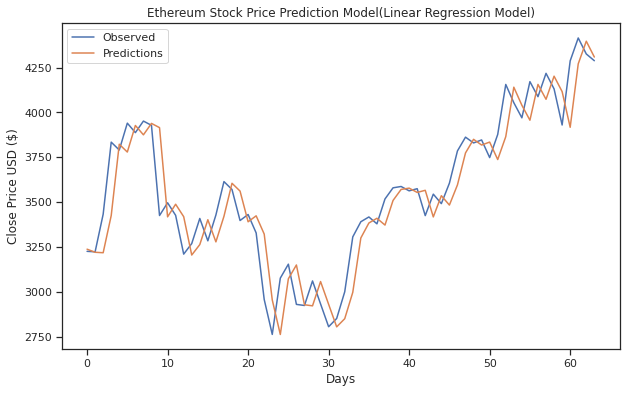

In [ ]:
eth = pd.read_csv('/content/ETH-USD.csv',encoding= 'utf-8',decimal = '.')
eth.tail()

eth = eth[['Close']]
eth['Prediction'] = eth[['Close']].shift(-1)
eth.tail()

eth = eth.to_numpy()

#Remove NaN
eth = eth[:-1][:-1]
#print(eth)

X_train = eth[:300,0]
X_train = X_train.reshape(-1,1)

X_test = eth[300:,0]
X_test = X_test.reshape(-1,1)

y_train = eth[:300,1]
y_train = y_train.reshape(-1,1)

y_test = eth[300:,1]
y_test = y_test.reshape(-1,1)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

R2 = r2_score(y_test, y_pred)
print('R2:', R2)


plt.figure(figsize=(10, 6))
plt.title("Ethereum Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price USD ($)")
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(["Observed", "Predictions"])
plt.show()
